# Bitcoin Price Prediction

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.layers import Embedding

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.
/home/hvyd/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Load and organize Data

In [2]:
df = pd.read_csv("data/BTC_data.csv")
df['date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('date')
Real_Price = group['Weighted_Price'].mean()

In [3]:
df.shape

(1819074, 9)

In [4]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01
1,1417412040,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01
2,1417412100,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01
3,1417412160,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01
4,1417412220,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819074 entries, 0 to 1819073
Data columns (total 9 columns):
Timestamp            int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
date                 object
dtypes: float64(7), int64(1), object(1)
memory usage: 124.9+ MB


In [6]:
df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,1.819074e+06,1.819074e+06,1.819074e+06,1.819074e+06,1.819074e+06,1.819074e+06,1.819074e+06,1.819074e+06
mean,1.475477e+09,2.675297e+03,2.676668e+03,2.673809e+03,2.675296e+03,7.655652e+00,3.362466e+04,2.675235e+03
std,3.152261e+07,3.825363e+03,3.827901e+03,3.822689e+03,3.825395e+03,1.808389e+01,1.414530e+05,3.825293e+03
min,1.417412e+09,6.000000e-02,6.000000e-02,6.000000e-02,6.000000e-02,1.000000e-08,2.641700e-06,6.000000e-02
25%,1.448199e+09,3.632800e+02,3.633800e+02,3.631900e+02,3.632700e+02,7.821000e-01,4.139733e+02,3.632763e+02
50%,1.475485e+09,6.665400e+02,6.666900e+02,6.663400e+02,6.665300e+02,2.590000e+00,2.171610e+03,6.665237e+02
75%,1.502772e+09,3.666010e+03,3.668000e+03,3.663780e+03,3.665940e+03,7.540866e+00,1.456778e+04,3.665488e+03
max,1.530058e+09,1.989199e+04,1.989199e+04,1.989198e+04,1.989199e+04,1.563267e+03,1.997076e+07,1.989199e+04


## Split and Proccess DataSet

In [7]:
prediction_days = 30
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))

mms = MinMaxScaler()
training_set = mms.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

## Initialized and Train Model

In [8]:
# LSTM
batch_size = 5
num_epochs = 100

model = Sequential()

model.add(LSTM(4, activation = 'sigmoid', input_shape=(None, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])

model.summary()



Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lstm_1 (LSTM)                    (None, 4)             96          lstm_input_1[0][0]               
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 1)             5           lstm_1[0][0]                     
Total params: 101
Trainable params: 101
Non-trainable params: 0
____________________________________________________________________________________________________


In [9]:
model.fit(X_train, y_train, batch_size, num_epochs)

Epoch 1/100
1240/1240 [==============================] - 1s - loss: 0.2152 - acc: 8.0645e-04     
Epoch 2/100
1240/1240 [==============================] - 0s - loss: 0.0425 - acc: 8.0645e-04     
Epoch 3/100
1240/1240 [==============================] - 0s - loss: 0.0267 - acc: 8.0645e-04     
Epoch 4/100
1240/1240 [==============================] - 0s - loss: 0.0227 - acc: 8.0645e-04     
Epoch 5/100
1240/1240 [==============================] - 0s - loss: 0.0192 - acc: 8.0645e-04     
Epoch 6/100
1240/1240 [==============================] - 1s - loss: 0.0159 - acc: 8.0645e-04     
Epoch 7/100
1240/1240 [==============================] - 1s - loss: 0.0126 - acc: 0.0016     
Epoch 8/100
1240/1240 [==============================] - 0s - loss: 0.0097 - acc: 0.0016     
Epoch 9/100
1240/1240 [==============================] - 0s - loss: 0.0070 - acc: 0.0016     
Epoch 10/100
1240/1240 [==============================] - 0s - loss: 0.0047 - acc: 0.0016     
Epoch 11/100
1240/1240 [===========

## Prediction

In [11]:
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = mms.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = model.predict(inputs)
predicted_BTC_price = mms.inverse_transform(predicted_BTC_price)

## Visualization

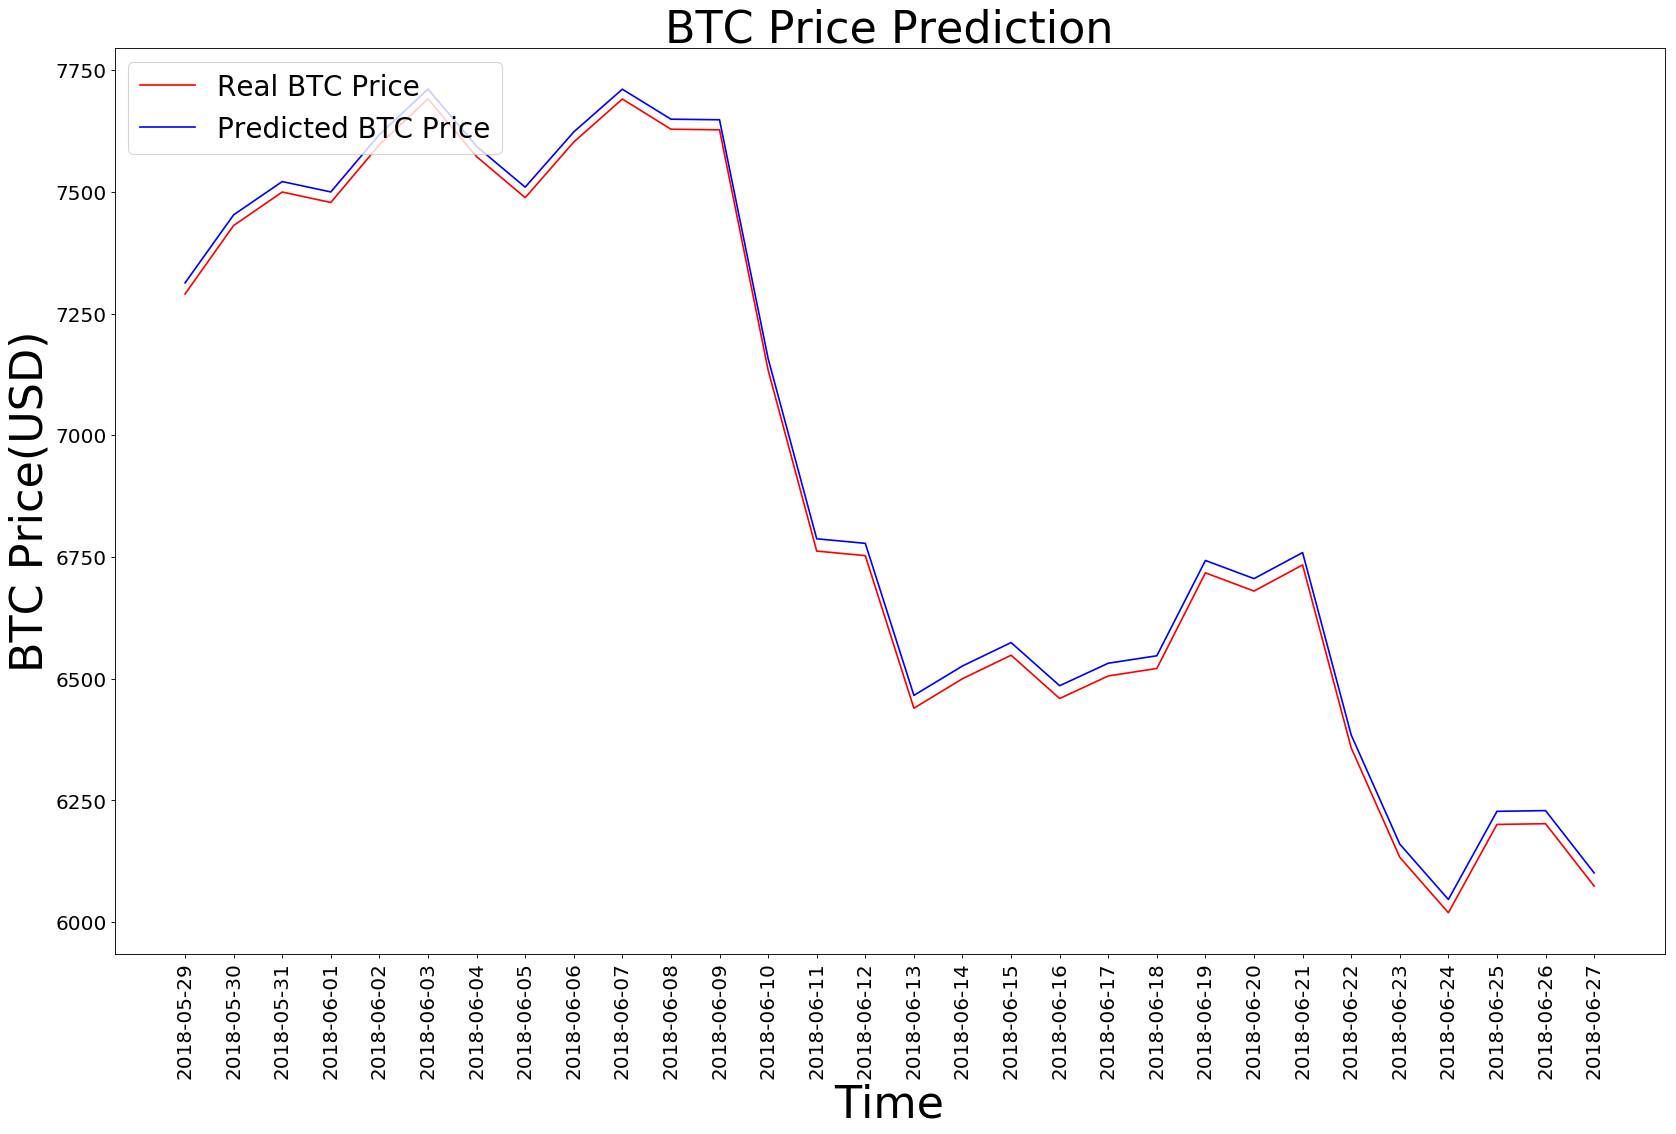

In [12]:
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()